## Including libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
data = pd.read_csv("weight-height.csv")
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data_female = data[data['Gender'] == 'Female']
data_male = data[data['Gender'] == 'Male']

In [8]:
data_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 5000 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5000 non-null   object 
 1   Height  5000 non-null   float64
 2   Weight  5000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 156.2+ KB


In [9]:
data_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5000 non-null   object 
 1   Height  5000 non-null   float64
 2   Weight  5000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 156.2+ KB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
data_female = data_female.iloc[:,1:]

In [13]:
data_male = data_male.iloc[:,1:]

In [14]:
data_female.head()

,Height,Weight
5000,58.910732,102.088326
5001,65.230013,141.305823
5002,63.369004,131.041403
5003,64.479997,128.171511
5004,61.793096,129.781407


In [15]:
data_female.isnull().sum()

Height    0
Weight    0
dtype: int64

## Spliting the female data

In [61]:
# training input and output set
train_input = np.array(data_female.Height[0:4500]).reshape(4500,1)
train_output = np.array(data_female.Weight[0:4500]).reshape(4500,1)

In [62]:
# validation input and output
valid_input = np.array(data_female.Height[4500:5000]).reshape(500, 1)
valid_output = np.array(data_female.Weight[4500:5000]).reshape(500, 1)

In [63]:
print("training data input shape ", train_input.shape)
print("training data otput shape ", train_output.shape)
print("validation data input shape ", valid_input.shape)
print("validation data otput shape ", valid_output.shape)

training data input shape  (4500, 1)
training data otput shape  (4500, 1)
validation data input shape  (500, 1)
validation data otput shape  (500, 1)


## <font color='green'>Linear Regression</font>

## Forward Propagation

f(x) = mx + c

In [64]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Cost Function

cost = summation(1/2n * (y_pred - y)^2)

In [65]:
def cost_function(predictions, train_output):
    
    cost = np.mean((predictions - train_output)**2) * 0.5
    
    return cost

## Gradient Descent for Back Propagartion

df = summation(1/n (y_pred - y))

dm = df * x

dc = df * 1

![derivatives](lefs.png )

In [66]:
def backward_propagation(predictions, train_output, train_input):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Updating parameters

m = m - (learning_rate*dm)

c = c - (learning_rate*dc)

In [67]:
def update_parameters(parameters, derivatives, learning_rate):
    
    parameters['m'] = parameters['m'] - learning_rate*derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate*derivatives['dc']
    
    return parameters

## Model training

In [68]:
def train(train_input, train_output, learning_rate, iters):
    
    parameters = dict()
    
    # random parameters
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    loss = list()
    
    # iterations
    for i in range(iters):
    
        # forward propogation 
        predictions = forward_propagation(train_input, parameters)

        # cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"ieration number: {i+1}, Loss: {cost}")
        
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label='Original')
        plt.plot(train_input, predictions, '*', label='Training')
        plt.show()

        # backward propogation
        derivatives = backward_propagation(predictions, train_output, train_input)

        # updating parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training 

ieration number: 1, Loss: 7879.759015997571


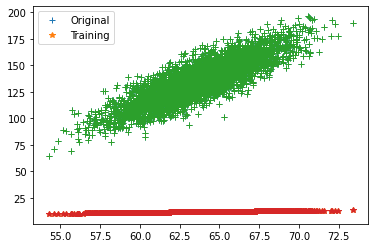

ieration number: 2, Loss: 2840.929347098887


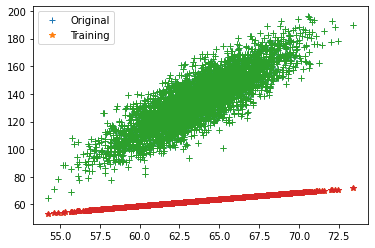

ieration number: 3, Loss: 1067.7400029710316


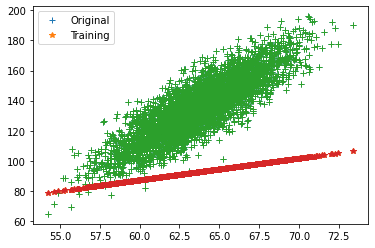

ieration number: 4, Loss: 443.74580227264016


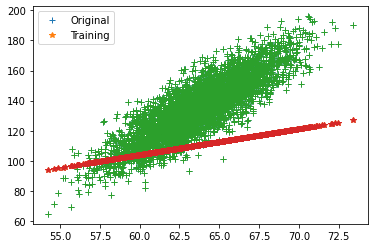

ieration number: 5, Loss: 224.1591132234557


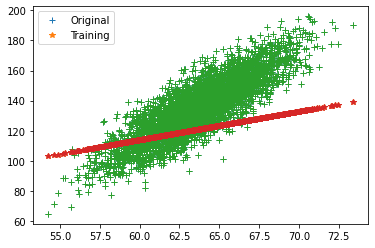

ieration number: 6, Loss: 146.8854476963239


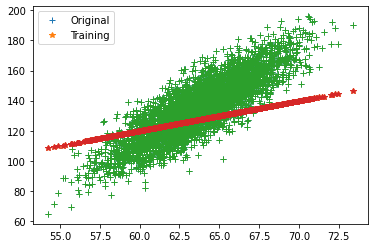

ieration number: 7, Loss: 119.69244605546933


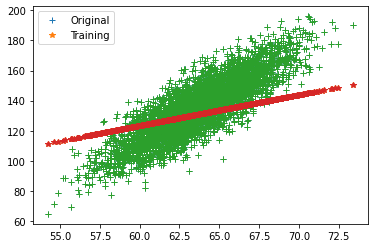

ieration number: 8, Loss: 110.12308020858015


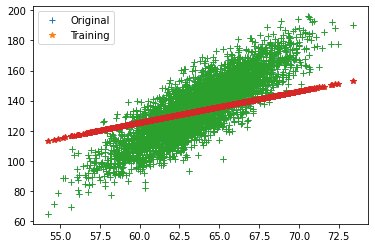

ieration number: 9, Loss: 106.75555983450207


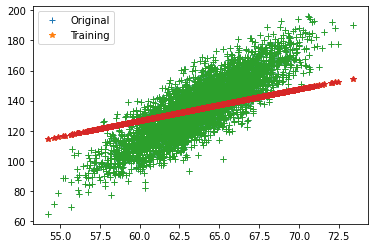

ieration number: 10, Loss: 105.57049986293923


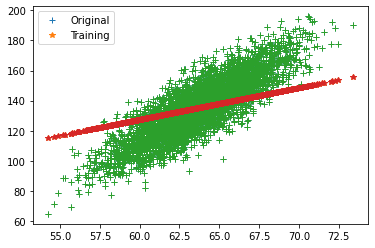

In [70]:
parameters, loss = train(train_input, train_output, 0.0001, 10)

In [71]:
print(parameters)

{'m': 2.1200197808206602, 'c': 0.5148380466710176}


In [72]:
loss

[7879.759015997571,
 2840.929347098887,
 1067.7400029710316,
 443.74580227264016,
 224.1591132234557,
 146.8854476963239,
 119.69244605546933,
 110.12308020858015,
 106.75555983450207,
 105.57049986293923]

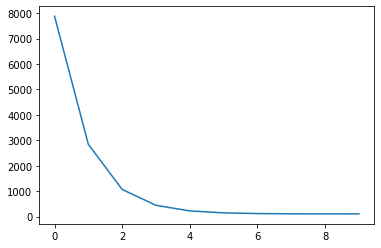

In [73]:
plt.plot(loss)

## Prediction

In [74]:
test_predictions = valid_input * parameters['m'] + parameters['c']

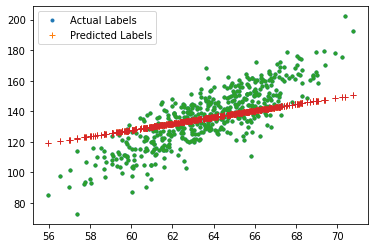

In [77]:
fig, ax = plt.subplots()

ax.plot(valid_input, valid_output, '.', label='Actual Labels')
ax.plot(valid_input, test_predictions, '+', label='Predicted Labels')

legend = ax.legend()

plt.plot(valid_input, valid_output, '.', label='Actual Labels')
plt.plot(valid_input, test_predictions, '+', label='Predicted Labels')
plt.show()

## Cost of predictions

In [76]:
print(cost_function(test_predictions, valid_output))

102.62135189555437
